# Definition

## Oil sector의 구조를 포착한다. 

- 업스트림은 원유 발굴과 생산, 미드스트림은 원유의 처리 및 운송, 다운스트림은 원유의 가공 및 유통을 의미

### 업스트림(Upstream): 원유의 발굴 및 생산 단계를 말한다. 이 단계에서는 지질 탐사 및 시추를 통해 원유와 천연가스가 발견되고 생산되며, 원유 광물의 생산장이나 시추 탑승선과 같은 시설이 포함된다.

### 미드스트림(Midstream): 원유의 처리 및 운송 단계를 의미한다. 원유가 생산되면, 이 단계에서는 원유가 정제, 분리, 저장 및 운송되는 과정을 거칩니다. 원유는 파이프라인, 탱크, 운송 수단 등을 통해 정제 공장으로 운반된다.
 
### 다운스트림(Downstream): 원유의 가공 및 유통 단계를 나타낸다. 이 단계에서는 정제된 원유를 가공하여 다양한 종류의 연료, 플라스틱, 화학 물질 등을 생산한다. 이러한 제품은 주유소, 화학 공장, 플라스틱 제조업체 등을 통해 최종 소비자에게 유통된다.

### 미드스트림
수요 안정성: 원유의 수요는 전 세계적으로 매우 안정적입니다. 원유는 에너지 산업 및 다양한 산업 부문에서 필수적인 에너지원으로 사용되고 있습니다. 이러한 수요 안정성은 미드스트림 회사들이 꾸준한 수익을 올리는 데 도움이 됩니다.

장기 계약: 미드스트림 회사들은 일반적으로 장기 계약을 체결하여 원유 생산자와의 장기적인 협력을 유지합니다. 이러한 장기 계약은 수익의 예측 가능성과 안정성을 제공합니다. 또한, 원유 생산자와의 긴밀한 관계를 통해 미드스트림 회사들은 안정적인 비즈니스 파트너십을 유지할 수 있습니다.

다양한 수익원: 미드스트림 회사들은 원유 운송, 원유 저장, 원유 처리 등 다양한 서비스를 제공합니다. 이러한 다양성은 수익을 분산시키고 성과의 안정성을 높이는 데 도움이 됩니다. 예를 들어, 원유 가격의 변동에 따라 원유 생산에 대한 수익이 감소할 수 있더라도, 원유 운송이나 저장 등의 다른 부문에서 수익을 얻을 수 있습니다.

규제와 안전성: 미드스트림 회사들은 원유 운송과 관련된 안전 및 환경 규제를 준수해야 합니다. 이러한 규제와 안전성 요구사항은 미드스트림 회사들이 안정적이고 신뢰성 있는 운영을 유지하는 데 도움이 됩니다.

### 업스트림 ETF:
- SPDR S&P Oil & Gas Exploration & Production ETF (XOP)
- iShares U.S. Oil & Gas Exploration & Production ETF (IEO)
- Invesco Dynamic Energy Exploration & Production ETF (PXE)

### 미드스트림 ETF:

- Alerian MLP ETF (AMLP)
- Global X MLP ETF (MLPA)
- iShares U.S. Oil & Gas Midstream ETF (AMLP)

### 다운스트림 ETF:
- VanEck Vectors Oil Refiners ETF (CRAK)
iShares U.S. Oil & Gas Refiners & Marketing ETF (CRAK)
Invesco Dynamic Energy Sector ETF (PXE)

## package 세팅 및 데이터 세팅

### 패키지

In [2]:
# !pip install quandl

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import quandl
from pandas_datareader import data as pdr
import pandas_datareader as web
from datetime import datetime

In [4]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
pd.set_option('display.width', 100)
pd.set_option('display.max_rows', 500)

### help function

In [5]:
def PCWeights():
    '''
    Principal Components (PC) weights for each 28 PCs
    '''
    weights = pd.DataFrame()

    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])

    weights = weights.values.T
    return weights

In [6]:
def plot_PCA (dataset, start, end = None):

  if end is not None:
    dataset_test = dataset[start:end]

  else:
    dataset_test = dataset[start:]

  ## 스케일러
  scaler = StandardScaler().fit(dataset_test)
  dataset_sc = pd.DataFrame(scaler.fit_transform(dataset_test), columns = dataset_test.columns)
  ## PCA
  pca = PCA()
  PrincipalComponent=pca.fit(dataset_sc)  

  ## 누적 분산 보여주기
  NumEigenvalues=5
  idx = [f'PC{i}' for i in range(NumEigenvalues)]
  fig, axes = plt.subplots( figsize=(7,4))
  explained_variance_ratio = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues], index=idx)
  explained_variance_ratio.sort_values().plot.barh(title='Explained Variance Ratio by Top Factors',ax=axes)
  axes.set_xlim([0,1])
  # explained_variance_ratio.cumsum().plot(ylim=(0,1),ax=axes[1], title='Cumulative Explained Variance')
  
  
  # # explained_variance
  # pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Explained Variance_Top 5').head(NumEigenvalues).style.format('{:,.2%}'.format)

  ## pca 컴포넌트의 비중 보여주기
  

  weights = pd.DataFrame()

  for i in range(len(pca.components_)):
      weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])

  weights = weights.values.T
  
  NumComponents=3    
          
  topPortfolios = pd.DataFrame(weights[:NumComponents], columns=dataset.columns)
  topPortfolios.index = [f'Principal Component {i}' for i in range(1, NumComponents+1)]

  axes = topPortfolios.T.plot.bar(subplots=True, legend=False,figsize=(14,10))
  plt.subplots_adjust(hspace=0.35)
  axes[0].set_ylim(0, .2)
  plt.tight_layout()
  sns.despine()

  ##yield 커브 구조 보여주기

  fig, ax = plt.subplots(figsize=(8,5))
  pca_data = pd.DataFrame(pca.components_, 
                          index=[f'PC{i}' for i in range(pca.components_.shape[0])], 
                          columns=dataset.columns)

  pca_data.iloc[:3].T.plot(ax=ax)
  ax.set_xlabel("Principal Component")
  # plt.yticks([])
  plt.tight_layout()
  sns.despine()
  plt.show()

### 데이터 준비

#### Quanl 데이터

In [7]:
quandl.ApiConfig.api_key = "FKTM3JuTxzCy-6cgwWwt"

In [8]:
treasury_dict = {
    'DGS1MO': '1-month T-bill yield',
    'DGS3MO': '3-month T-bill yield',
    'DGS6MO': '6-month T-bill yield',
    'DGS1': '1-year T-note yield',
    'DGS2': '2-year T-note yield',
    'DGS3': '3-year T-note yield',
    'DGS5': '5-year T-note yield',
    'DGS7': '7-year T-note yield',
    'DGS10': '10-year T-bond yield',
    'DGS20': '20-year T-bond yield',
    'DGS30': '30-year T-bond yield'
}


quandlTreasuryKey = ["FRED/"+key for key in treasury_dict.keys()]
treasury_df = quandl.get(quandlTreasuryKey)

# 데이터셋 최적화
datasets = treasury_df.copy()
datasets.columns=[value for value in treasury_dict.values()]
datasets.reset_index(inplace=True)  # 인덱스 초기화
datasets.rename(columns={'Date': 'date'}, inplace=True)  # 'Date' 컬럼 이름을 'date'로 변경

#### pandas 데이터  데이터

In [9]:
# 마지막 날짜 확인
last_date = datasets['date'].max()
# 현재 날짜 가져오기
today = pd.Timestamp.today().strftime('%Y-%m-%d')

# 데이터 채워넣을 기간 설정
start_date = pd.to_datetime(last_date) + pd.DateOffset(days=1)
end_date = pd.to_datetime(today)
print(f"quandl 데이터의 마지막 일자는{last_date}입니다.")

if last_date != today:
    print(f"{start_date}부터 {end_date}의 데이터를 fred에서 채워 넣습니다")
    # 새로운 데이터 받아오기
    new_data = pdr.DataReader(list(treasury_dict.keys()), 'fred', start_date, end_date)
    new_data.columns = [value for value in treasury_dict.values()]
    new_data.reset_index(inplace=True)
    new_data.rename(columns={'DATE': 'date'}, inplace=True)  # 'Date' 컬럼 이름을 'date'로 변경
    
    # 데이터셋에 채워넣기
    datasets = pd.concat([datasets, new_data], axis=0,  ignore_index=True)
    datasets.set_index('date', inplace=True)

quandl 데이터의 마지막 일자는2022-07-15 00:00:00입니다.
2022-07-16 00:00:00부터 2023-06-18 00:00:00의 데이터를 fred에서 채워 넣습니다


In [10]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15359 entries, 1962-01-02 to 2023-06-15
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   1-month T-bill yield  5472 non-null   float64
 1   3-month T-bill yield  10448 non-null  float64
 2   6-month T-bill yield  10448 non-null  float64
 3   1-year T-note yield   15350 non-null  float64
 4   2-year T-note yield   11758 non-null  float64
 5   3-year T-note yield   15350 non-null  float64
 6   5-year T-note yield   15350 non-null  float64
 7   7-year T-note yield   13480 non-null  float64
 8   10-year T-bond yield  15350 non-null  float64
 9   20-year T-bond yield  13661 non-null  float64
 10  30-year T-bond yield  11580 non-null  float64
dtypes: float64(11)
memory usage: 1.4 MB


In [11]:
datasets.describe()

,1-month T-bill yield,3-month T-bill yield,6-month T-bill yield,1-year T-note yield,2-year T-note yield,3-year T-note yield,5-year T-note yield,7-year T-note yield,10-year T-bond yield,20-year T-bond yield,30-year T-bond yield
count,5472.000000,10448.000000,10448.000000,15350.000000,11758.000000,15350.000000,15350.000000,13480.000000,15350.000000,13661.000000,11580.000000
mean,1.285556,3.765992,3.949859,4.899301,5.005520,5.298310,5.554051,5.897381,5.885087,5.914676,6.260992
std,1.529197,3.213577,3.323752,3.427726,3.768456,3.313858,3.184898,3.250696,2.983227,2.893745,3.044584
min,0.000000,0.000000,0.020000,0.040000,0.090000,0.100000,0.190000,0.360000,0.520000,0.870000,0.990000
25%,0.060000,0.580000,0.900000,2.160000,1.580000,2.690000,3.120000,3.110000,3.840000,4.010000,3.740000
50%,0.760000,3.580000,3.805000,4.960000,4.770000,5.280000,5.480000,6.040000,5.660000,5.410000,5.720000
75%,1.980000,5.740000,5.960000,6.820000,7.370000,7.280000,7.490000,7.860000,7.640000,7.410000,8.220000
max,6.020000,17.010000,17.430000,17.310000,16.950000,16.590000,16.270000,16.050000,15.840000,15.780000,15.210000


In [12]:
# dataset = datasets['1998':].iloc[:,1:]
# print(dataset['1998':].isna().sum(0))
dataset = datasets.iloc[:,1:].dropna()
dataset = datasets
# print(dataset['1998':].isna().sum(0))

## 구조 ~

### Plot & Correlation
분석

In [30]:
data = datasets['2020':]
data = data.dropna(axis=1, thresh=1).dropna()

데이터의 시작 일: 2020-01-02
데이터의 마지막 일: 2023-06-15


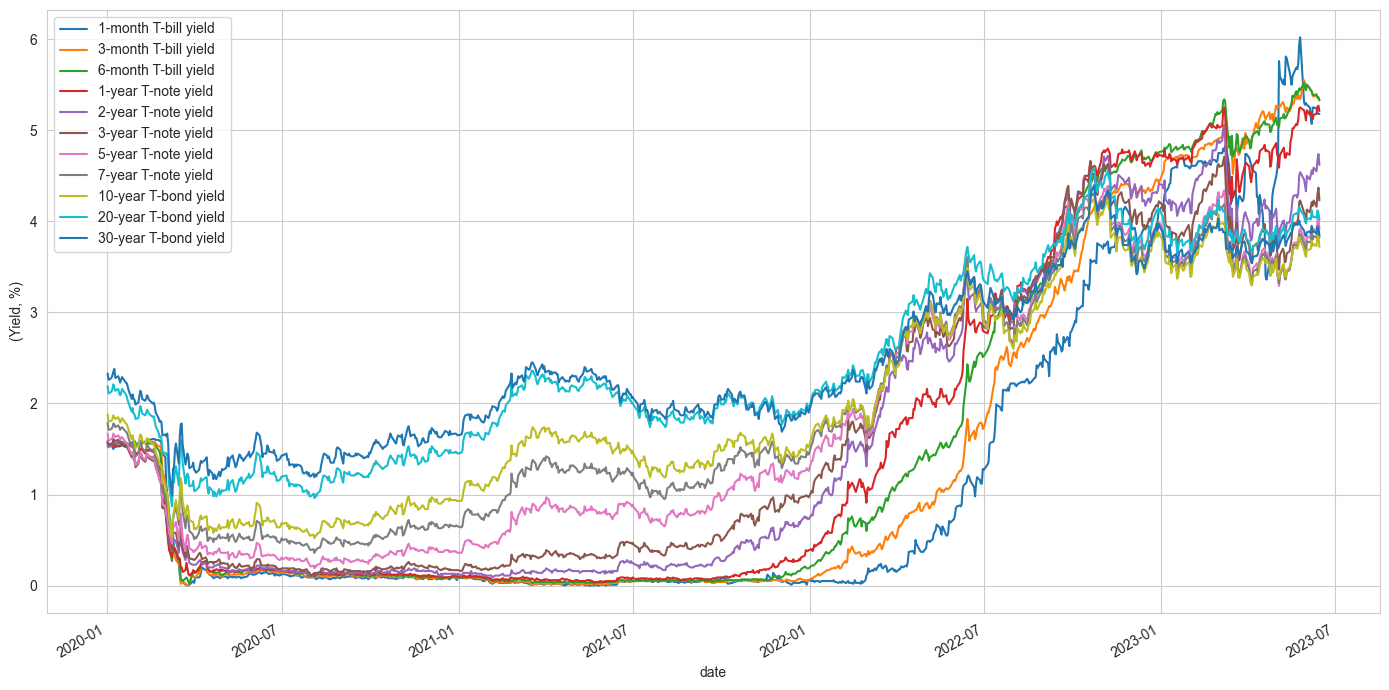

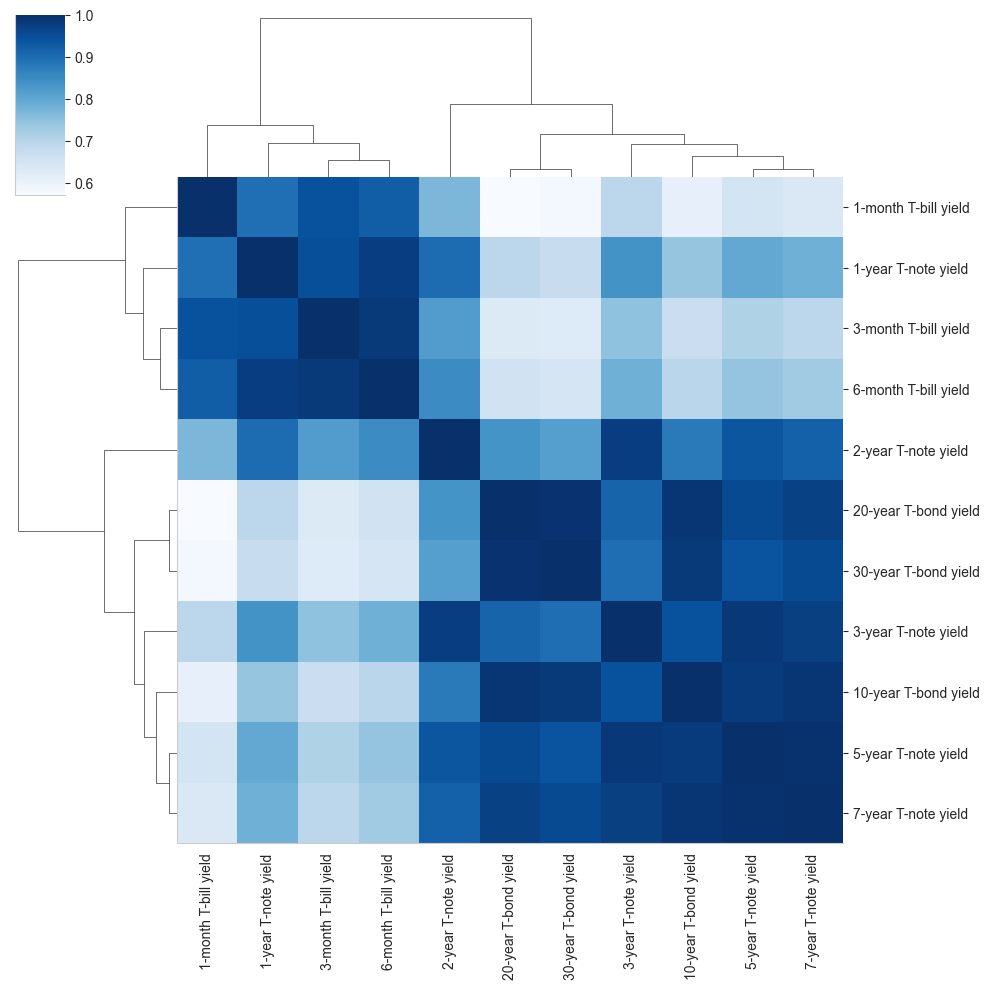

In [31]:
data.plot(figsize=(14,7))
plt.ylabel('(Yield, %)')
plt.tight_layout();

print(f"데이터의 시작 일: {data.index[0].strftime('%Y-%m-%d')}")
print(f"데이터의 마지막 일: {data.index[-1].strftime('%Y-%m-%d')}")
sns.clustermap(data.corr(method='spearman'), cmap='Blues')
sns.despine()

### With PCA
분석

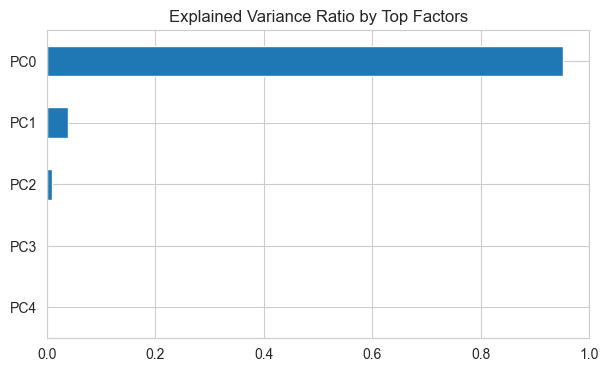

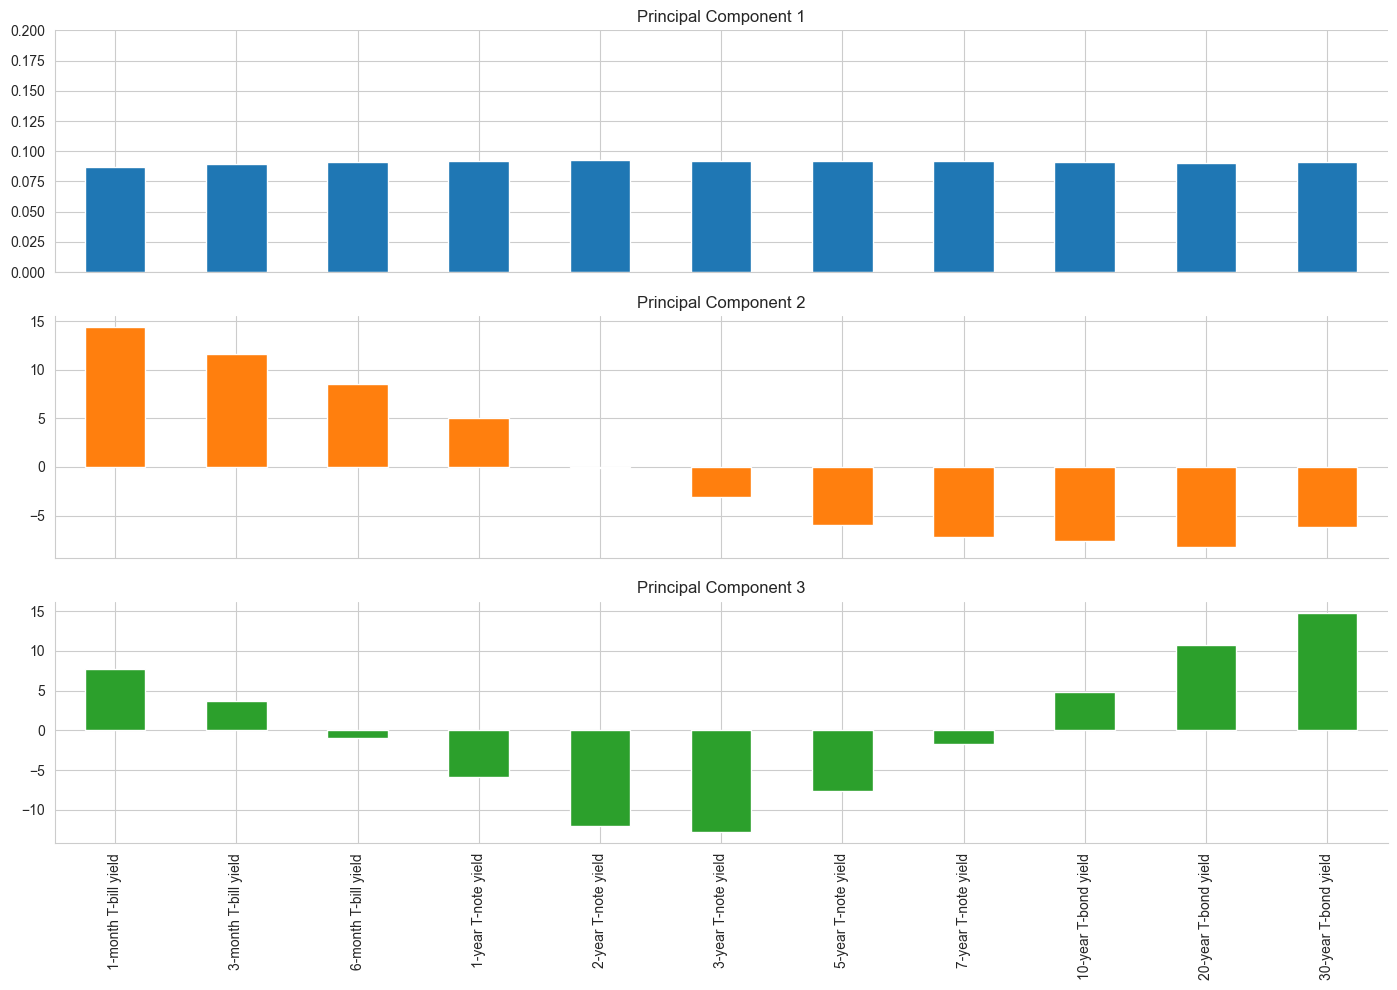

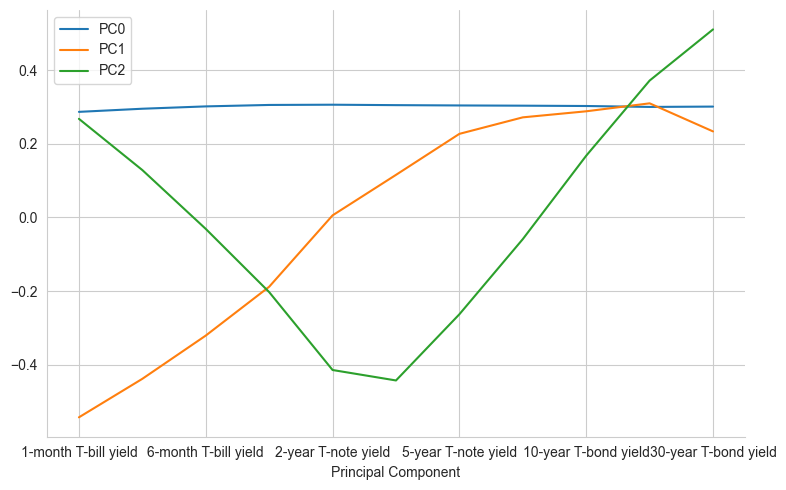

In [32]:
plot_PCA(data, start = '2020')

# 결론